In [2]:
import time
import random
import itertools
import numpy as np
import pandas as pd
from scipy import *
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.datasets import mnist
from keras.utils import to_categorical

#from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler

#%matplotlib inline


# Kagome

In [3]:
import networkx as nx

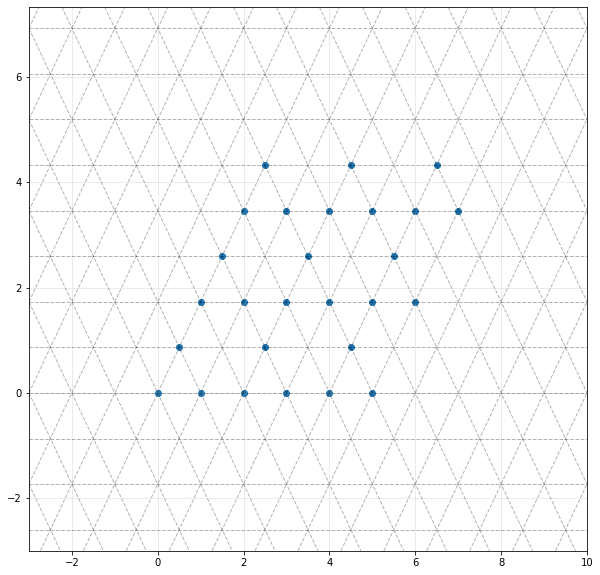

end


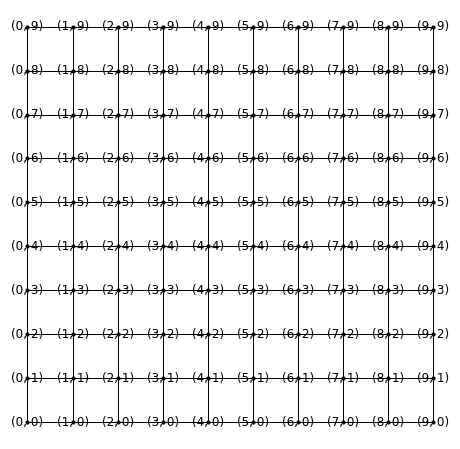

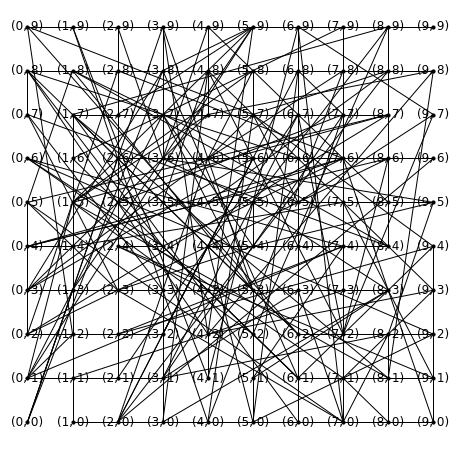

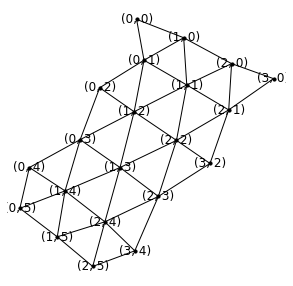

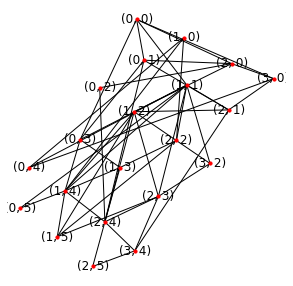

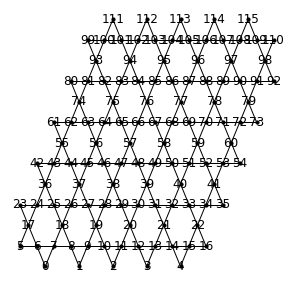

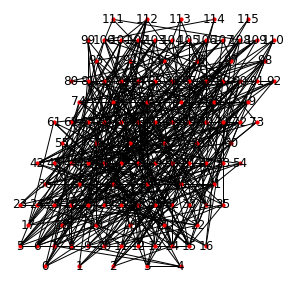

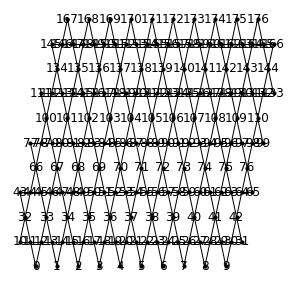

In [4]:
import ipynb.fs.full.Combined_Code as kg

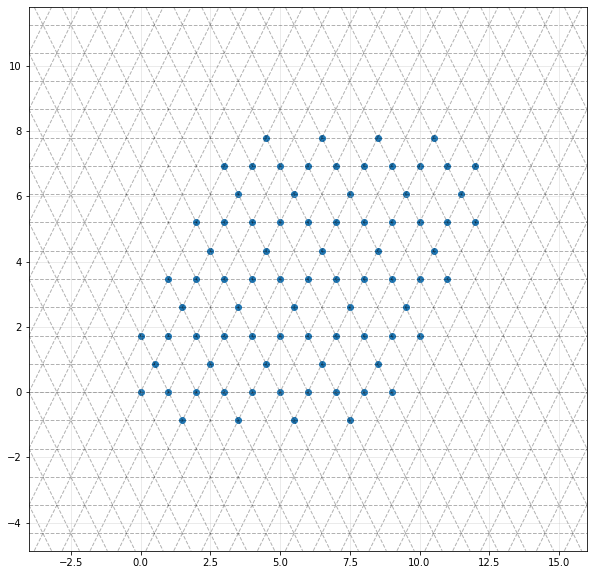

In [5]:
points = kg.Create_Points(4,4,plot=True,base="star")

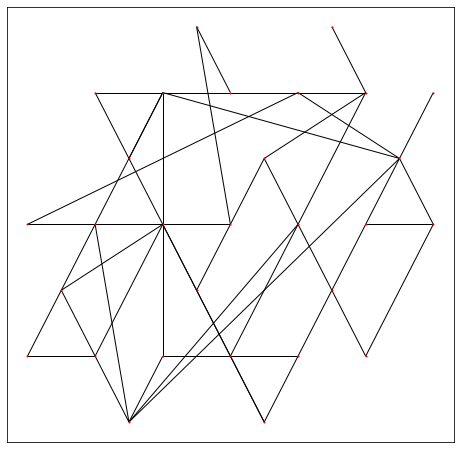

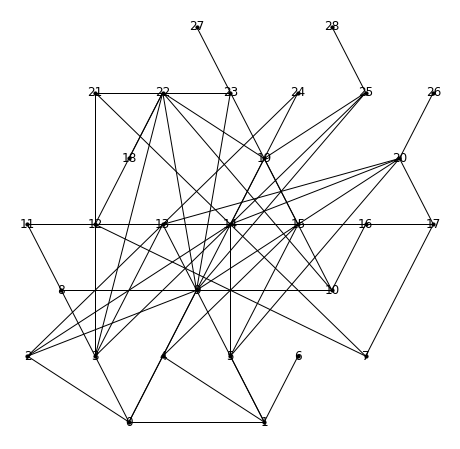

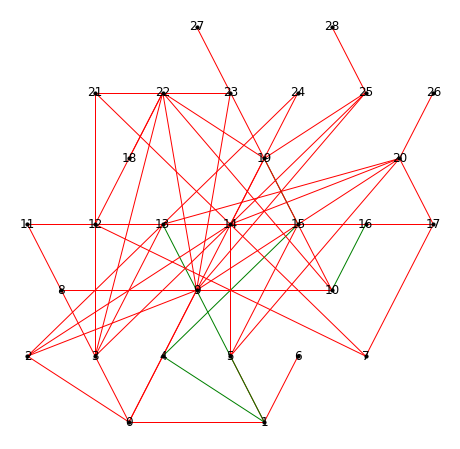

In [169]:
G,pos = kg.Create_Kagome_Graph(2,2,p=0.2,plot=True)


G = kg.Rewire_Grid("Kagome",G,0.5)
#pos1 = dict( (n, n) for n in G1.nodes() )
fig, ax = plt.subplots(figsize=(8,8))
nx.draw(G,pos,node_size=10,node_color="black",with_labels=True)


G = kg.Add_Weights(G,0.9)

colors=[]
for a,b,d in G.edges.data():
    if d['weight']==1:
        colors.append("green")
    else:
        colors.append("red")

#pos = {k: v for k,v in zip(G.nodes(), points)}
fig, ax = plt.subplots(figsize=(8,8))
nx.draw(G,pos,node_size=10,edge_color=colors,node_color="black",with_labels=True)

# NEW TRY

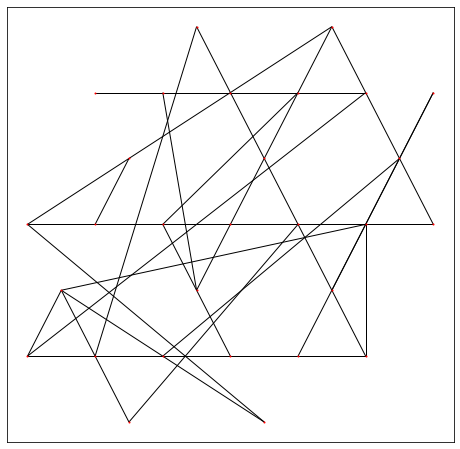

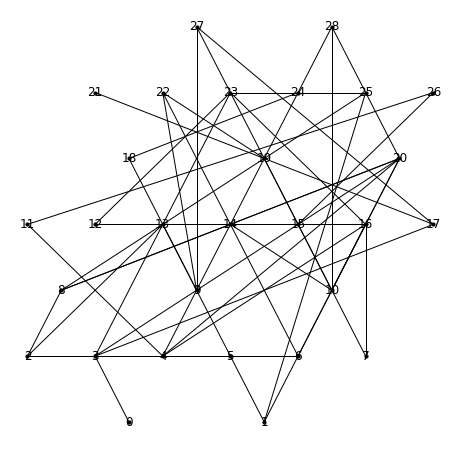

In [170]:
G,pos = kg.Create_Kagome_Graph(2,2,p=0.2,plot=True)


G = kg.Rewire_Grid("Kagome",G,0.5)
#pos1 = dict( (n, n) for n in G1.nodes() )
fig, ax = plt.subplots(figsize=(8,8))
nx.draw(G,pos,node_size=10,node_color="black",with_labels=True)

In [114]:

K = np.linspace(0,1,1000)
X0 = [];Y0 = []

option = "Kagome";n=2;m=2

for k in K:
    print(np.round(k,4))
    
    
    G,pos = kg.Choose_Graph(option,n,m)
    #G = Rewire_Grid(option,G,p)
    G = kg.Add_Weights(G,k)
    
    matrix = nx.to_numpy_matrix(G)

    X0.append(matrix)
    
    graphs, weights, signed_matrices = kg.Create_Data([matrix])

    objs0,solve_time0 = kg.XOR_Model(graphs, weights, signed_matrices)

    Y0.append(objs0[0])


0.0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009
0.01
0.011
0.012
0.013
0.014
0.015
0.016
0.017
0.018
0.019
0.02
0.021
0.022
0.023
0.024
0.025
0.026
0.027
0.028
0.029
0.03
0.031
0.032
0.033
0.034
0.035
0.036
0.037
0.038
0.039
0.04
0.041
0.042
0.043
0.044
0.045
0.046
0.047
0.048
0.049
0.0501
0.0511
0.0521
0.0531
0.0541
0.0551
0.0561
0.0571
0.0581
0.0591
0.0601
0.0611
0.0621
0.0631
0.0641
0.0651
0.0661
0.0671
0.0681
0.0691
0.0701
0.0711
0.0721
0.0731
0.0741
0.0751
0.0761
0.0771
0.0781
0.0791
0.0801
0.0811
0.0821
0.0831
0.0841
0.0851
0.0861
0.0871
0.0881
0.0891
0.0901
0.0911
0.0921
0.0931
0.0941
0.0951
0.0961
0.0971
0.0981
0.0991
0.1001
0.1011
0.1021
0.1031
0.1041
0.1051
0.1061
0.1071
0.1081
0.1091
0.1101
0.1111
0.1121
0.1131
0.1141
0.1151
0.1161
0.1171
0.1181
0.1191
0.1201
0.1211
0.1221
0.1231
0.1241
0.1251
0.1261
0.1271
0.1281
0.1291
0.1301
0.1311
0.1321
0.1331
0.1341
0.1351
0.1361
0.1371
0.1381
0.1391
0.1401
0.1411
0.1421
0.1431
0.1441
0.1451
0.1461
0.1471
0.1481
0.1491
0.1502

# NEURAL NETWORK

In [145]:
from keras import backend as K

def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

In [146]:
print(np.shape(X0),np.shape(Y0))

(1000, 29, 29) (1000,)


In [147]:
data = list(zip(X0,Y0))

np.random.shuffle(data)

X,Y=zip(*data)

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X_test, X_val, Y_test, Y_val  = train_test_split(X_test, Y_test, test_size=0.5, random_state=1) 

print(np.shape(X_train),np.shape(X_test),np.shape(X_val))
print(np.shape(Y_train),np.shape(Y_test),np.shape(Y_val))


X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_val = np.array(X_val)
Y_val= np.array(Y_val)

(700, 29, 29) (150, 29, 29) (150, 29, 29)
(700,) (150,) (150,)


In [149]:
print(len(X_train))

700


In [150]:
#import numpy as np
from numpy import reshape

#reshape data to fit model
X_train = X_train.reshape(len(X_train),29,29,1)
X_test = X_test.reshape(len(X_test),29,29,1)
X_val = X_val.reshape(len(X_val),29,29,1)

print(np.shape(X_train),np.shape(X_test),np.shape(X_val))
print(np.shape(Y_train),np.shape(Y_test),np.shape(Y_val))

(700, 29, 29, 1) (150, 29, 29, 1) (150, 29, 29, 1)
(700,) (150,) (150,)


In [161]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model
model = Sequential()#add model layers
model.add(Conv2D(841, kernel_size=20, activation="relu", input_shape=(29,29,1)))
#model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(1, activation="linear"))

model.summary()

#compile model using accuracy to measure model performance
#model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer="Adam", loss="mean_squared_error",metrics=[soft_acc])

#from keras.optimizers import SGD
#opt = SGD(lr=0.01)
#model.compile(loss = "mean_squared_error", optimizer = opt,metrics=[soft_acc])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 10, 10, 841)       337241    
_________________________________________________________________
flatten_17 (Flatten)         (None, 84100)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 84101     
Total params: 421,342
Trainable params: 421,342
Non-trainable params: 0
_________________________________________________________________


In [171]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50)

Epoch 1/50
22/22 [==============================] - 0s 18ms/step - loss: 2.1231 - soft_acc: 0.2453 - val_loss: 5.6060 - val_soft_acc: 0.1523
Epoch 2/50
22/22 [==============================] - 0s 17ms/step - loss: 1.8710 - soft_acc: 0.2948 - val_loss: 5.1966 - val_soft_acc: 0.2324
Epoch 3/50
22/22 [==============================] - 0s 17ms/step - loss: 1.4730 - soft_acc: 0.3273 - val_loss: 5.0715 - val_soft_acc: 0.1739
Epoch 4/50
22/22 [==============================] - 0s 17ms/step - loss: 1.3272 - soft_acc: 0.3224 - val_loss: 5.0622 - val_soft_acc: 0.1955
Epoch 5/50
22/22 [==============================] - 0s 17ms/step - loss: 1.1910 - soft_acc: 0.3545 - val_loss: 4.9448 - val_soft_acc: 0.1676
Epoch 6/50
22/22 [==============================] - 0s 17ms/step - loss: 1.4057 - soft_acc: 0.3876 - val_loss: 5.1369 - val_soft_acc: 0.1636
Epoch 7/50
22/22 [==============================] - 0s 17ms/step - loss: 1.2718 - soft_acc: 0.3535 - val_loss: 4.8540 - val_soft_acc: 0.1119
Epoch 8/50
22

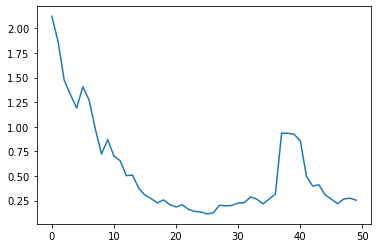

In [172]:
plt.plot(history.history['loss'])

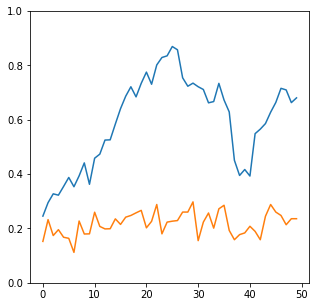

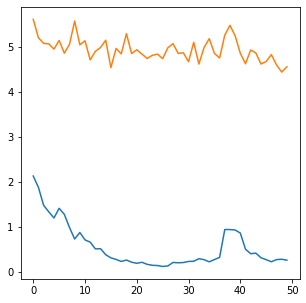

In [173]:
fig, ax = plt.subplots(figsize=(5,5))
plt.plot([i for i in range(len(history.history["soft_acc"]))], history.history["soft_acc"])
plt.plot([i for i in range(len(history.history["val_soft_acc"]))], history.history["val_soft_acc"])
plt.ylim(0,1)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
plt.plot([i for i in range(len(history.history["loss"]))], history.history["loss"])
plt.plot([i for i in range(len(history.history["val_loss"]))], history.history["val_loss"])

In [174]:
print(Y_train[0])
print(np.shape(X_train[0]))


pogodak=0
predictions = model.predict(X_train)
for pred,true in zip(predictions,Y_train):
    print(true, np.round(pred,1)[0],np.sqrt((true-np.round(pred,1)[0])**2)<1)
    if(np.sqrt((true-np.round(pred,1)[0])**2)<1):
        pogodak+=1
print(pogodak/len(Y_train))

8.0
(29, 29, 1)
8.0 8.0 True
5.0 5.2 True
1.0 1.5 True
3.0 3.1 True
10.0 9.6 True
6.0 5.6 True
13.0 12.7 True
9.0 8.5 True
8.0 8.4 True
7.0 7.3 True
7.0 6.2 True
2.0 2.1 True
10.0 9.5 True
15.0 13.6 False
2.0 1.9 True
11.0 10.1 True
9.0 8.2 True
4.0 3.7 True
10.0 9.7 True
10.0 9.8 True
12.0 11.6 True
2.0 2.2 True
10.0 8.9 False
6.0 5.2 True
6.0 5.9 True
6.0 5.5 True
7.0 7.0 True
10.0 9.6 True
8.0 8.1 True
9.0 8.4 True
10.0 9.4 True
11.0 11.6 True
5.0 5.1 True
13.0 12.3 True
6.0 5.2 True
12.0 11.3 True
6.0 5.9 True
9.0 8.0 False
5.0 5.1 True
10.0 10.4 True
11.0 10.4 True
8.0 7.8 True
9.0 9.1 True
8.0 8.0 True
10.0 9.5 True
7.0 6.2 True
10.0 10.5 True
6.0 5.9 True
5.0 5.2 True
8.0 7.7 True
2.0 2.0 True
4.0 3.8 True
15.0 14.6 True
3.0 3.0 True
9.0 8.4 True
10.0 9.5 True
7.0 6.3 True
7.0 7.4 True
11.0 10.4 True
15.0 14.5 True
15.0 13.8 False
9.0 8.4 True
15.0 14.5 True
3.0 3.0 True
8.0 7.2 True
10.0 9.1 True
6.0 6.3 True
7.0 6.7 True
11.0 11.0 True
6.0 6.4 True
10.0 9.0 False
8.0 7.3 True


In [175]:
print(Y_val[0])
print(np.shape(X_val[0]))

pogodak=0
predictions = model.predict(X_val)
for pred,true in zip(predictions,Y_val):
    print(true, np.round(pred,2)[0])
    if(np.sqrt((true-np.round(pred,1)[0])**2)<1.0):
        pogodak+=1
        
print(pogodak/len(Y_val))

7.0
(29, 29, 1)
7.0 9.04
5.0 4.49
2.0 0.75
10.0 8.87
12.0 11.79
15.0 14.57
6.0 3.95
9.0 6.41
9.0 6.97
7.0 7.95
14.0 12.65
7.0 4.2
4.0 4.31
2.0 4.43
6.0 5.92
3.0 6.93
9.0 10.57
8.0 8.81
1.0 1.08
5.0 5.23
9.0 6.03
14.0 13.99
6.0 5.75
9.0 10.46
4.0 8.03
11.0 6.87
7.0 8.57
9.0 5.06
7.0 7.13
0.0 0.2
6.0 5.85
8.0 6.85
10.0 8.45
5.0 8.16
11.0 12.09
8.0 10.74
6.0 11.19
10.0 10.22
6.0 6.99
7.0 5.08
14.0 13.36
8.0 5.39
9.0 10.34
12.0 9.47
4.0 5.74
11.0 6.56
6.0 6.36
12.0 11.64
4.0 6.6
7.0 9.46
10.0 7.04
9.0 6.97
10.0 7.67
7.0 4.01
11.0 11.71
8.0 6.76
11.0 11.82
0.0 0.2
2.0 2.31
11.0 11.42
8.0 6.49
8.0 6.86
11.0 10.71
6.0 12.66
9.0 9.72
12.0 10.64
7.0 5.77
6.0 4.56
12.0 12.09
5.0 9.37
10.0 6.88
8.0 8.64
15.0 14.76
7.0 7.64
2.0 1.8
10.0 12.28
9.0 3.66
8.0 6.66
3.0 2.98
8.0 6.32
6.0 6.14
9.0 4.78
1.0 0.94
0.0 0.2
11.0 5.16
4.0 5.87
7.0 7.98
4.0 3.44
1.0 1.01
8.0 5.34
9.0 8.97
9.0 5.53
3.0 3.15
4.0 4.78
9.0 6.11
9.0 9.51
7.0 10.12
6.0 7.63
6.0 8.13
9.0 6.36
9.0 13.39
13.0 9.25
10.0 6.26
11.0 9.14
6.

# Different matrix sizes

In [ ]:

K = np.linspace(0,1,100)
X0 = [];Y0 = []

option = "Kagome";n=2;m=2

for size in range(0,4):

    for k in K:
        print(np.round(k,4))


        G,pos = kg.Choose_Graph(option,size,size)
        #G = Rewire_Grid(option,G,p)
        G = kg.Add_Weights(G,k)

        matrix = nx.to_numpy_matrix(G)

        X0.append(matrix)

        graphs, weights, signed_matrices = kg.Create_Data([matrix])

        objs0,solve_time0 = kg.XOR_Model(graphs, weights, signed_matrices)

        Y0.append(objs0[0])


# DATA